In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import glob
import statistics

# ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [4]:
data = pd.read_csv("./marketing.csv")
data

,ID,BirthYear,Education,Marital_Status,Income,NKids,EnrollDate,Recency,Complain,AmtFruits,AmtMeats,AmtFish,AmtSweets,AmtGold,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDiscPurchases,AccCampaign,Response
0,1,1985,Graduation,Married,70951.0,0,4/5/2013,66,0,10,554,254,87,54,3,4,9,1,None,No
1,2,1961,Graduation,Single,57091.0,0,15/6/2014,0,0,5,64,7,0,37,7,3,7,1,Second,Yes
2,3,1975,Master,Single,46098.0,2,18/8/2012,86,0,0,27,0,0,36,3,2,2,4,None,No
3,4,1947,PhD,Widow,25358.0,1,22/7/2013,57,0,0,5,0,0,8,1,0,3,2,None,No
4,5,1971,PhD,Married,60491.0,1,6/9/2013,81,0,47,237,12,19,76,6,11,7,4,None,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,2226,1991,Graduation,Together,89891.0,0,15/4/2013,17,0,22,132,59,28,183,11,6,8,1,None,No
2226,2227,1973,Graduation,Single,3502.0,1,13/4/2013,56,0,1,1,0,0,1,0,0,0,0,None,No
2227,2228,1966,Graduation,Together,70713.0,1,3/12/2012,23,0,114,279,82,76,190,5,6,8,6,None,No
2228,2229,1970,Graduation,Together,19656.0,1,8/2/2013,94,0,4,9,6,8,32,2,1,3,3,None,No


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2230 non-null   int64  
 1   BirthYear            2230 non-null   int64  
 2   Education            2230 non-null   object 
 3   Marital_Status       2230 non-null   object 
 4   Income               2206 non-null   float64
 5   NKids                2230 non-null   int64  
 6   EnrollDate           2230 non-null   object 
 7   Recency              2230 non-null   int64  
 8   Complain             2230 non-null   int64  
 9   AmtFruits            2230 non-null   int64  
 10  AmtMeats             2230 non-null   int64  
 11  AmtFish              2230 non-null   int64  
 12  AmtSweets            2230 non-null   int64  
 13  AmtGold              2230 non-null   int64  
 14  NumWebPurchases      2230 non-null   int64  
 15  NumCatalogPurchases  2230 non-null   i

In [6]:
data.rename(columns={'BirthYear': 'YearBirth',
                     'Marital_Status': 'MaritalStatus',
                     'NKids': 'KidHome'
                     }, inplace=True)
data.head()


,ID,YearBirth,Education,MaritalStatus,Income,KidHome,EnrollDate,Recency,Complain,AmtFruits,AmtMeats,AmtFish,AmtSweets,AmtGold,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDiscPurchases,AccCampaign,Response
0,1,1985,Graduation,Married,70951.0,0,4/5/2013,66,0,10,554,254,87,54,3,4,9,1,None,No
1,2,1961,Graduation,Single,57091.0,0,15/6/2014,0,0,5,64,7,0,37,7,3,7,1,Second,Yes
2,3,1975,Master,Single,46098.0,2,18/8/2012,86,0,0,27,0,0,36,3,2,2,4,None,No
3,4,1947,PhD,Widow,25358.0,1,22/7/2013,57,0,0,5,0,0,8,1,0,3,2,None,No
4,5,1971,PhD,Married,60491.0,1,6/9/2013,81,0,47,237,12,19,76,6,11,7,4,None,No


In [7]:
data.isnull().sum()

ID                      0
YearBirth               0
Education               0
MaritalStatus           0
Income                 24
KidHome                 0
EnrollDate              0
Recency                 0
Complain                0
AmtFruits               0
AmtMeats                0
AmtFish                 0
AmtSweets               0
AmtGold                 0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumDiscPurchases        0
AccCampaign             0
Response                0
dtype: int64

In [8]:
unique_Education = pd.unique(data.Education)

temp_data = data.copy()

columns = ['Income']

for c in unique_Education: 
    Education_filter = temp_data.Education == c
    
    filtered_data = temp_data[Education_filter] 
    
    for s in columns: 
        mean = np.round(np.mean(filtered_data[s]), 2)
        if ~np.isnan(mean):
            filtered_data[s] = filtered_data[s].fillna(mean)
            print(
                f"Missing Value in {s} column fill with {mean} when Education:{c}")
        else: 
            all_data_mean = np.round(np.mean(data[s]), 2)
            filtered_data[s] = filtered_data[s].fillna(all_data_mean)
            print(f"Missing Value in {s} column fill with {all_data_mean}")
    
    temp_data[Education_filter] = filtered_data 
data = temp_data.copy()


Missing Value in Income column fill with 52784.6 when Education:Graduation
Missing Value in Income column fill with 52935.38 when Education:Master
Missing Value in Income column fill with 55930.07 when Education:PhD
Missing Value in Income column fill with 47633.19 when Education:2n Cycle
Missing Value in Income column fill with 20189.64 when Education:Basic


In [9]:
data.isnull().sum()

ID                     0
YearBirth              0
Education              0
MaritalStatus          0
Income                 0
KidHome                0
EnrollDate             0
Recency                0
Complain               0
AmtFruits              0
AmtMeats               0
AmtFish                0
AmtSweets              0
AmtGold                0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumDiscPurchases       0
AccCampaign            0
Response               0
dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
from datetime import datetime as dt

data['EnrollDate'] = pd.to_datetime(data['EnrollDate'])

data['Year'] = data["EnrollDate"].dt.year
data['Month'] = data["EnrollDate"].dt.month

# create Age column
age = []
for i in data["YearBirth"]:
    if i <= 1959:
        age.append("Elderly")
    elif i > 1959 and i <= 1977:
        age.append("MiddleAge")
    else:
        age.append("Young")
data["Age"] = age

data.drop(['EnrollDate'],axis=1,inplace=True) 


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2230 non-null   int64  
 1   YearBirth            2230 non-null   int64  
 2   Education            2230 non-null   object 
 3   MaritalStatus        2230 non-null   object 
 4   Income               2230 non-null   float64
 5   KidHome              2230 non-null   int64  
 6   Recency              2230 non-null   int64  
 7   Complain             2230 non-null   int64  
 8   AmtFruits            2230 non-null   int64  
 9   AmtMeats             2230 non-null   int64  
 10  AmtFish              2230 non-null   int64  
 11  AmtSweets            2230 non-null   int64  
 12  AmtGold              2230 non-null   int64  
 13  NumWebPurchases      2230 non-null   int64  
 14  NumCatalogPurchases  2230 non-null   int64  
 15  NumStorePurchases    2230 non-null   i

In [13]:
data.describe()

,ID,YearBirth,Income,KidHome,Recency,Complain,AmtFruits,AmtMeats,AmtFish,AmtSweets,AmtGold,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDiscPurchases,Year,Month
count,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000
mean,1115.500000,1968.806726,52247.147722,0.949776,49.099552,0.028700,26.386996,167.542152,37.661883,27.162332,44.147534,4.088789,2.668161,5.799552,2.324215,2013.027354,6.520179
std,643.889872,11.991205,24972.822070,0.751363,28.942510,0.166998,39.838013,226.039140,54.711959,41.344634,52.243737,2.779662,2.926990,3.252731,1.931834,0.684813,3.512753
min,1.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,1.000000
25%,558.250000,1959.000000,35568.250000,0.000000,24.000000,0.000000,1.000000,16.000000,3.000000,1.000000,9.000000,2.000000,0.000000,3.000000,1.000000,2013.000000,3.000000
50%,1115.500000,1970.000000,51684.000000,1.000000,49.000000,0.000000,8.000000,68.000000,12.000000,8.000000,24.000000,4.000000,2.000000,5.000000,2.000000,2013.000000,6.000000
75%,1672.750000,1977.000000,68343.000000,1.000000,74.000000,0.000000,33.000000,232.750000,50.000000,34.000000,56.750000,6.000000,4.000000,8.000000,3.000000,2013.000000,10.000000
max,2230.000000,1996.000000,666666.000000,3.000000,99.000000,1.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,27.000000,28.000000,13.000000,15.000000,2014.000000,12.000000


In [14]:
data[['Education','MaritalStatus']].describe()

,Education,MaritalStatus
count,2230,2230
unique,5,8
top,Graduation,Married
freq,1123,861


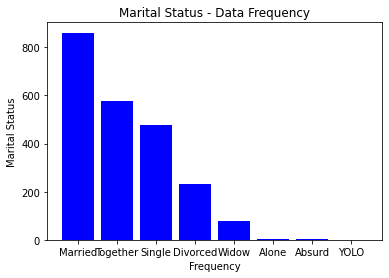

Number of Samples According to Marital Status 
Married     861
Together    577
Single      478
Divorced    231
Widow        77
Alone         3
Absurd        2
YOLO          1
Name: MaritalStatus, dtype: int64


In [15]:
plt.figure()
plt.bar(data["MaritalStatus"].value_counts().index,
        data["MaritalStatus"].value_counts(), color="b")
plt.xlabel("Frequency")
plt.ylabel("Marital Status")
plt.title("Marital Status - Data Frequency")
plt.show()
print(
    f"Number of Samples According to Marital Status \n{data['MaritalStatus'].value_counts()}")


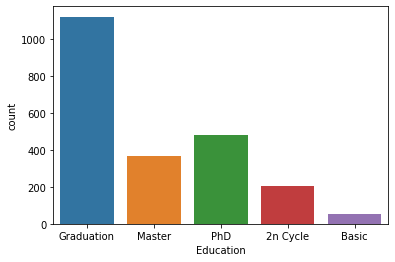

Number of samples According to Education 
Graduation    1123
PhD            483
Master         368
2n Cycle       203
Basic           53
Name: Education, dtype: int64


In [16]:
sns.countplot(x="Education", data=data)
plt.xticks(rotation=0)
plt.show()
print(
    f"Number of samples According to Education \n{data['Education'].value_counts()}")


In [17]:
df = data[["Education", 'MaritalStatus']].value_counts().groupby(["Education", "MaritalStatus"]).sum(
).reset_index().sort_values(by=['Education', 'MaritalStatus'], ascending=False)
df = (df.pivot(index='Education', columns='MaritalStatus', values=0))
df


MaritalStatus,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,NaN,NaN,23.0,81.0,37.0,57.0,5.0,NaN
Basic,NaN,NaN,1.0,20.0,17.0,14.0,1.0,NaN
Graduation,1.0,1.0,118.0,432.0,252.0,284.0,35.0,NaN
Master,1.0,1.0,37.0,137.0,74.0,106.0,12.0,NaN
PhD,NaN,1.0,52.0,191.0,98.0,116.0,24.0,1.0


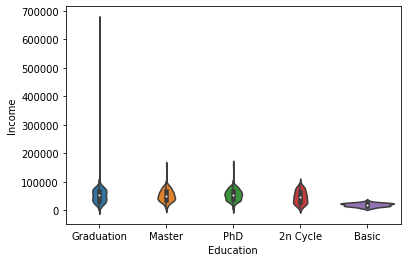

In [18]:
sns.violinplot(x="Education", y="Income", data=data)
plt.show()


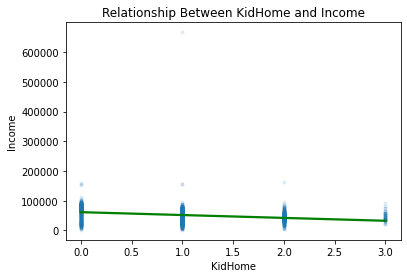

In [19]:
sns.regplot(x='KidHome', y='Income', data=data, marker=".",
            scatter_kws={'alpha': 0.1}, line_kws={'color': "green"})
plt.title('Relationship Between KidHome and Income')
plt.show()


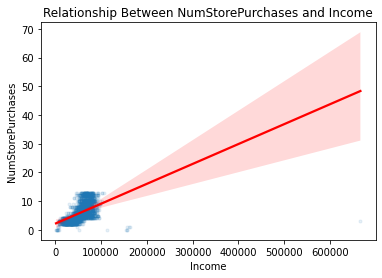

In [20]:
sns.regplot(x='Income', y='NumStorePurchases', data=data, marker=".",
            scatter_kws={'alpha': 0.1}, line_kws={'color': "red"})
plt.title('Relationship Between NumStorePurchases and Income')
plt.show()


# Campaign analysis

In [21]:
pd.crosstab(index= data["Education"], columns=data['Response'])

Response,No,Yes
Education,,
2n Cycle,180,23
Basic,51,2
Graduation,967,156
Master,310,58
PhD,383,100


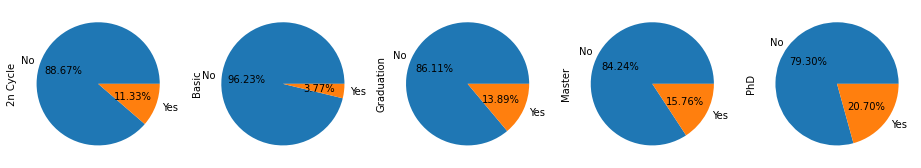

In [22]:
pd.crosstab(index=data['Response'], columns=data['Education']).plot(
    kind="pie", figsize=(16, 8), subplots=True, autopct='%1.2f%%', legend=False)
plt.show()

In [23]:
cam1 = []
cam2 = []
for i in data['AccCampaign']:
    if i == "First":
       cam1.append(1)
       cam2.append(0)
    elif i == "Second": 
        cam1.append(0) 
        cam2.append(1)
    elif i=='Both':
        cam1.append(1) 
        cam2.append(1)
    else: 
        cam1.append(0)
        cam2.append(0)

data['FirstCampaign'] = cam1 
data['SecondCampaign'] = cam2 




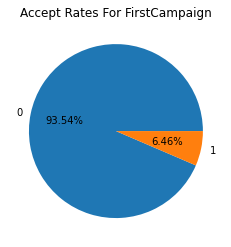

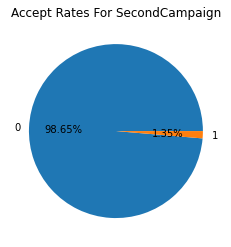

In [24]:
campaigns = ['FirstCampaign', 'SecondCampaign'] 

for i in campaigns:
    accept_rate = (data.groupby(i).size() / data[i].count()) * 100
    plt.title(f"Accept Rates For {i}")
    plt.pie(accept_rate, labels=data[i].unique(), autopct='%1.2f%%')
    plt.show()


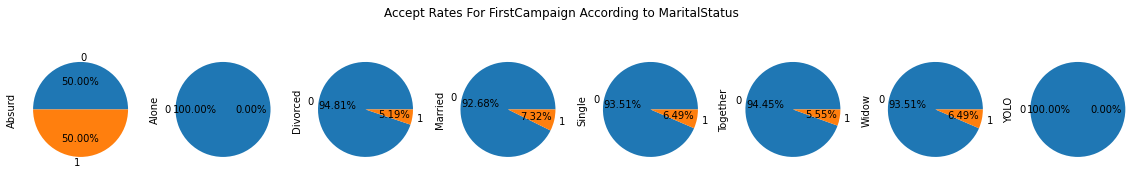

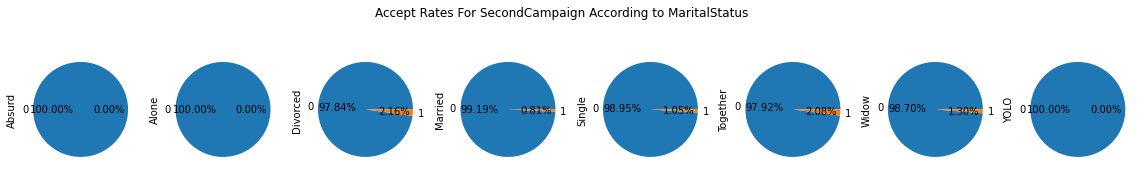

In [25]:
for i in campaigns:
    pd.crosstab(index=data[i], columns=data['MaritalStatus']).plot(kind="pie", figsize=(20, 3), subplots=True, autopct='%1.2f%%',
                                                                   legend=False, title=f"Accept Rates For {i} According to MaritalStatus")
    plt.show()


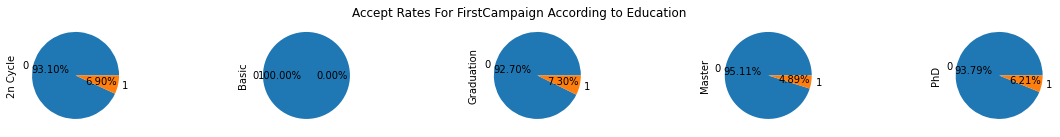

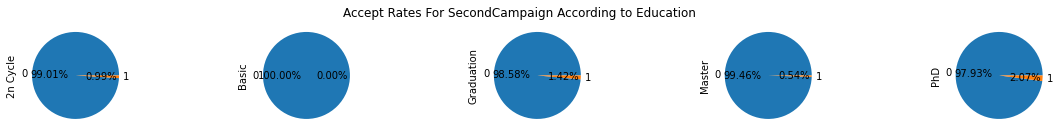

In [26]:
for i in campaigns:
    pd.crosstab(index=data[i], columns=data['Education']).plot(kind="pie", figsize=(20, 2), subplots=True, autopct='%1.2f%%',
                                                               legend=False, title=f"Accept Rates For {i} According to Education")
    plt.show()


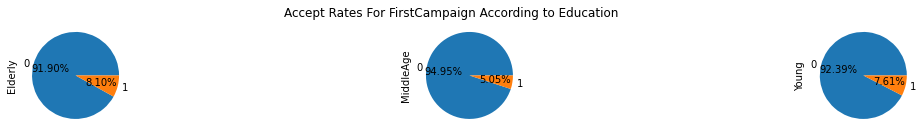

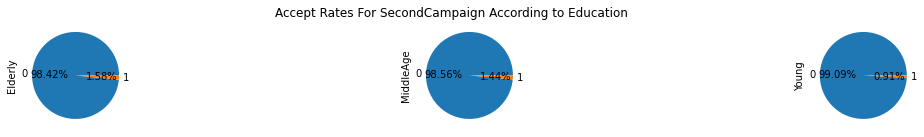

In [27]:
for i in campaigns:
    pd.crosstab(index=data[i], columns=data['Age']).plot(kind="pie", figsize=(20, 2), subplots=True, autopct='%1.2f%%',
                                                               legend=False, title=f"Accept Rates For {i} According to Education")
    plt.show()


# Product analysis

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2230 non-null   int64  
 1   YearBirth            2230 non-null   int64  
 2   Education            2230 non-null   object 
 3   MaritalStatus        2230 non-null   object 
 4   Income               2230 non-null   float64
 5   KidHome              2230 non-null   int64  
 6   Recency              2230 non-null   int64  
 7   Complain             2230 non-null   int64  
 8   AmtFruits            2230 non-null   int64  
 9   AmtMeats             2230 non-null   int64  
 10  AmtFish              2230 non-null   int64  
 11  AmtSweets            2230 non-null   int64  
 12  AmtGold              2230 non-null   int64  
 13  NumWebPurchases      2230 non-null   int64  
 14  NumCatalogPurchases  2230 non-null   int64  
 15  NumStorePurchases    2230 non-null   i

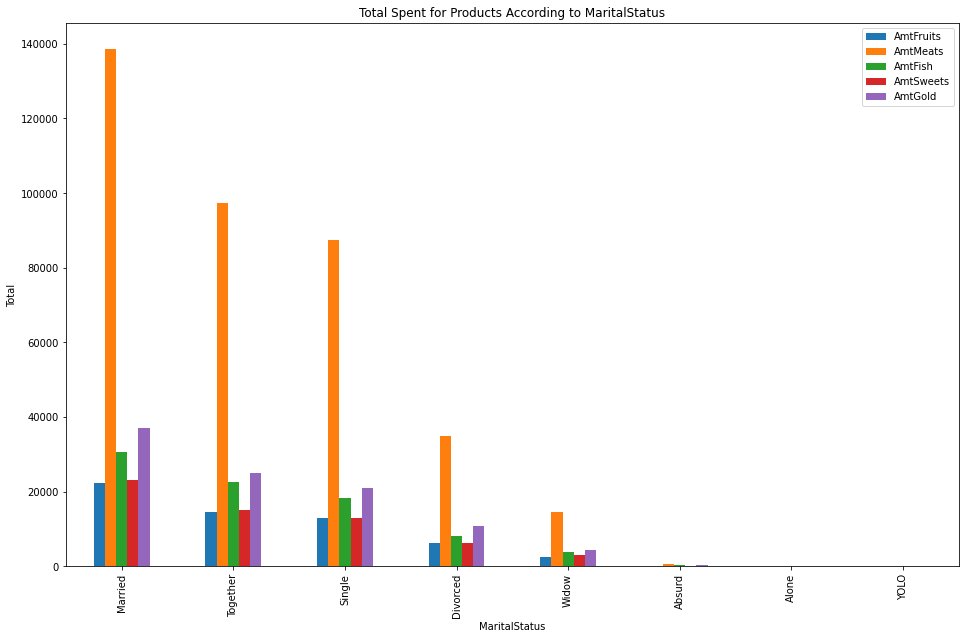

In [29]:
df = data[["AmtFruits", "AmtMeats", "AmtFish", "AmtSweets", "AmtGold", 'MaritalStatus']].groupby(["MaritalStatus"]).sum(
).reset_index().sort_values(by=["AmtFruits", "AmtMeats", "AmtFish", "AmtSweets", "AmtGold", 'MaritalStatus'], ascending=False)

df.plot(x="MaritalStatus", ylabel="Total", kind="bar", figsize=(16, 10),
        legend=True, title="Total Spent for Products According to MaritalStatus")
plt.show()


# Purchase Analysis According to Age


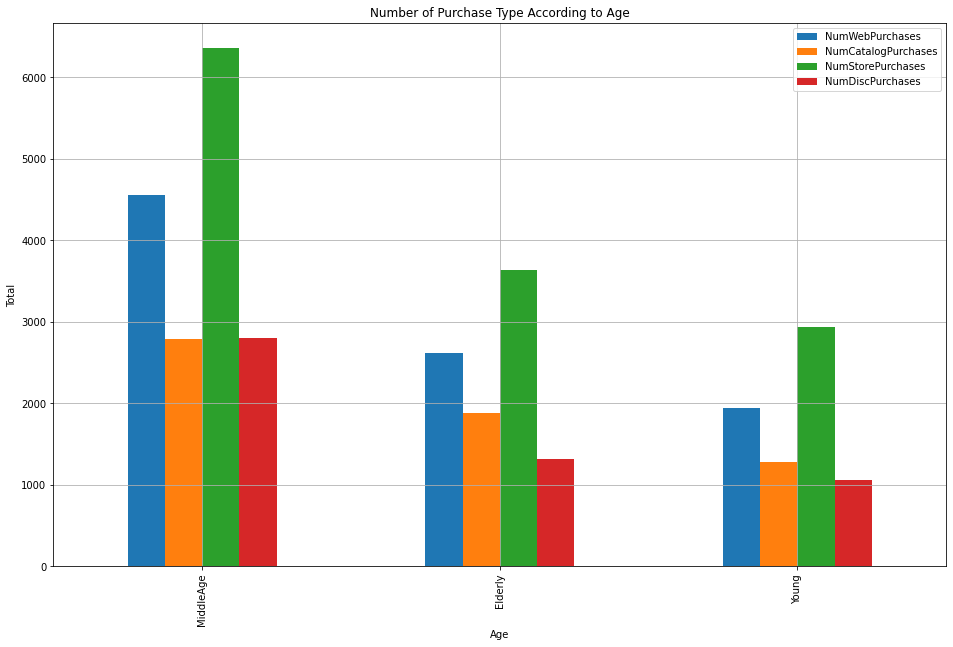

In [30]:
# purchase type according to age
df = data[["Age", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumDiscPurchases"]].groupby(["Age"]).sum(
).reset_index().sort_values(by=["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"], ascending=False)
df.plot(x="Age", ylabel="Total", kind="bar", figsize=(16, 10), legend=True, grid=True,
        title="Number of Purchase Type According to Age")
plt.show()


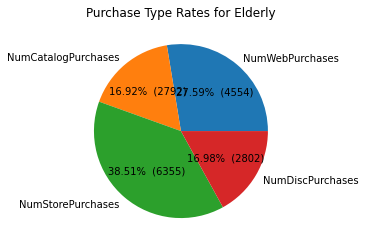

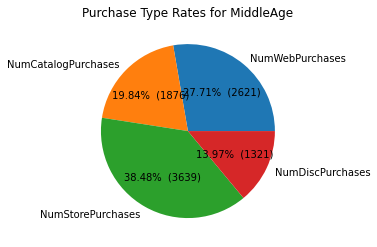

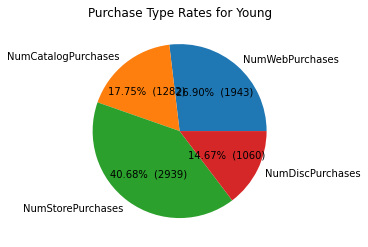

In [31]:
# Purchase Type Rates according to Age
# set target row index
target_row_index = [0, 1, 2]

# make the pie circular by setting the aspect ratio to 1
plt.figure(figsize=plt.figaspect(1))

# specify data for chart
values = df.iloc[target_row_index, 1:]
labels = df.columns[1:]

# define function to format values on chart


def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.2f}%  ({val:d})'
    return my_autopct


for i in target_row_index:
    values = df.iloc[i, 1:]
    labels = df.columns[1:]
    plt.title(f"Purchase Type Rates for {df.loc[i].Age}")
    plt.pie(values, labels=labels, autopct=make_autopct(values))
    plt.show()


Complain analysis

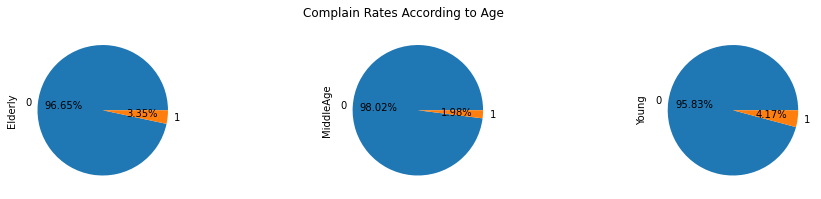

In [32]:
df = pd.crosstab(index=data["Complain"], columns=data['Age'])
df.plot(x="Complain", kind="pie", figsize=(16, 3), legend=False, subplots=True, autopct='%1.2f%%',
        title="Complain Rates According to Age")
plt.show()


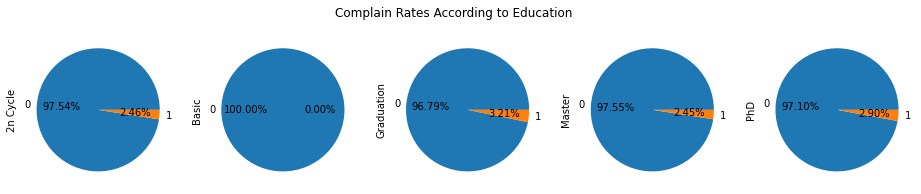

In [33]:
df = pd.crosstab(index=data["Complain"], columns=data['Education'])
df.plot(x="Complain", kind="pie", figsize=(16, 3), legend=False, subplots=True, autopct='%1.2f%%',
        title="Complain Rates According to Education")
plt.show()


# Recency Analysis

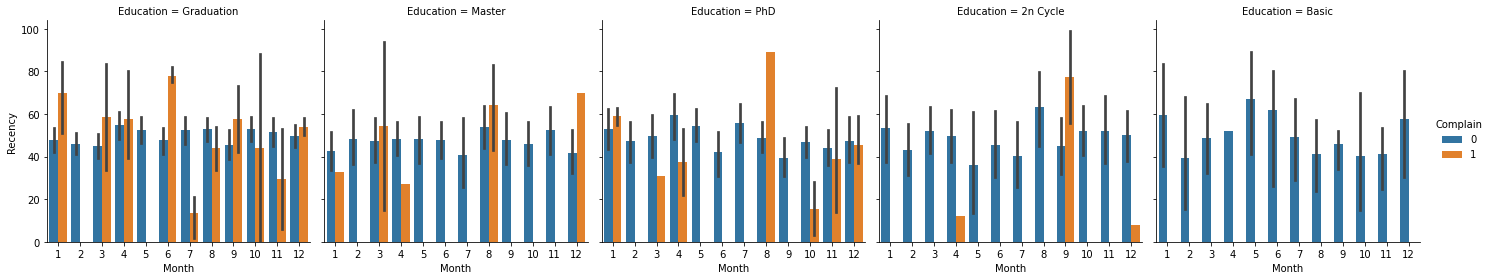

In [34]:
sns.catplot(x="Month", y="Recency",  hue="Complain", col="Education",
            data=data, kind="bar", height=4)
plt.show()


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2230 non-null   int64  
 1   YearBirth            2230 non-null   int64  
 2   Education            2230 non-null   object 
 3   MaritalStatus        2230 non-null   object 
 4   Income               2230 non-null   float64
 5   KidHome              2230 non-null   int64  
 6   Recency              2230 non-null   int64  
 7   Complain             2230 non-null   int64  
 8   AmtFruits            2230 non-null   int64  
 9   AmtMeats             2230 non-null   int64  
 10  AmtFish              2230 non-null   int64  
 11  AmtSweets            2230 non-null   int64  
 12  AmtGold              2230 non-null   int64  
 13  NumWebPurchases      2230 non-null   int64  
 14  NumCatalogPurchases  2230 non-null   int64  
 15  NumStorePurchases    2230 non-null   i

In [36]:
data.drop(["Year", "Month", "YearBirth", "Response",
          "Complain", 'AccCampaign'], axis=1, inplace=True)


In [37]:
data
data = pd.get_dummies(data, columns=['Age', "Education", "MaritalStatus"])
data.head(3)


,ID,Income,KidHome,Recency,AmtFruits,AmtMeats,AmtFish,AmtSweets,AmtGold,NumWebPurchases,...,Education_Master,Education_PhD,MaritalStatus_Absurd,MaritalStatus_Alone,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Together,MaritalStatus_Widow,MaritalStatus_YOLO
0,1,70951.0,0,66,10,554,254,87,54,3,...,0,0,0,0,0,1,0,0,0,0
1,2,57091.0,0,0,5,64,7,0,37,7,...,0,0,0,0,0,0,1,0,0,0
2,3,46098.0,2,86,0,27,0,0,36,3,...,1,0,0,0,0,0,1,0,0,0


In [38]:
data.to_csv("hello.csv")


In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
data = pd.DataFrame(scaler.transform(data), columns=data.columns)


Dimensionality Reduction

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(data)
PCA_ds = pd.DataFrame(pca.transform(data), columns=(["col1", "col2", "col3"]))
PCA_ds.describe().T


,count,mean,std,min,25%,50%,75%,max
col1,2230.0,2.230403e-17,2.289430,-3.907443,-2.027403,-0.683589,1.835312,6.799165
col2,2230.0,2.549032e-17,1.430813,-4.369077,-0.975969,-0.182813,0.982201,4.416177
col3,2230.0,4.460806e-17,1.302963,-2.662037,-1.004111,0.012161,0.814597,3.512963


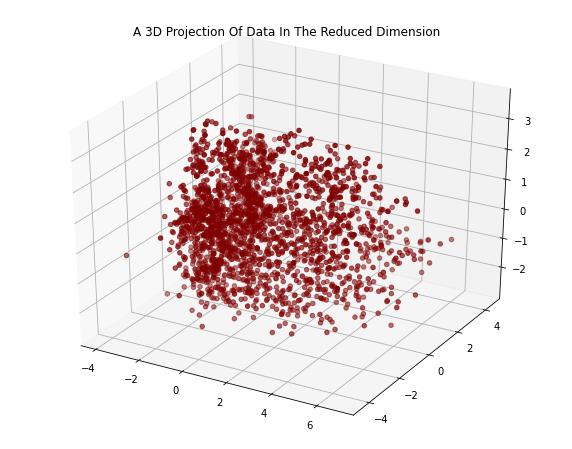

In [41]:
x = PCA_ds["col1"]
y = PCA_ds["col2"]
z = PCA_ds["col3"]
# To plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z, c="maroon", marker="o")
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()


Customer Clustering

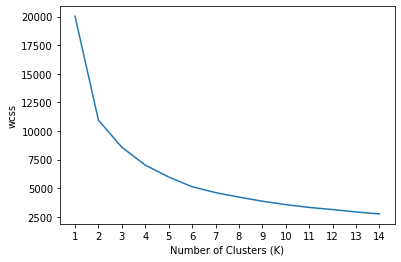

In [42]:
from sklearn.cluster import KMeans
wcss = []

for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(PCA_ds)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 15), wcss)
plt.xticks(range(1, 15))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("wcss")
plt.show()


In [43]:
from sklearn.cluster import AgglomerativeClustering
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=3)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

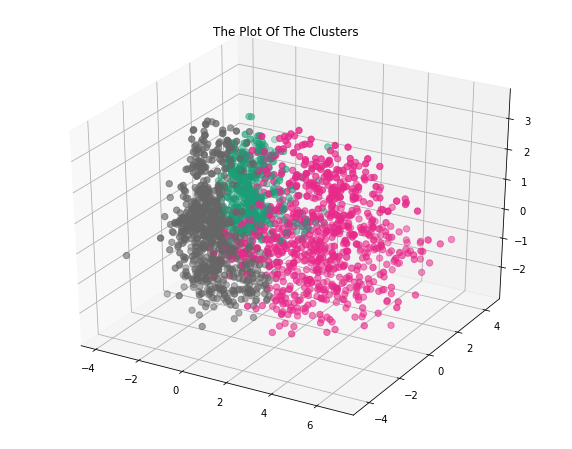

In [44]:
pal = ["#682F2F", "#B9C0C9", "#9F8A78"]
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap="Dark2_r")
ax.set_title("The Plot Of The Clusters")
plt.show()


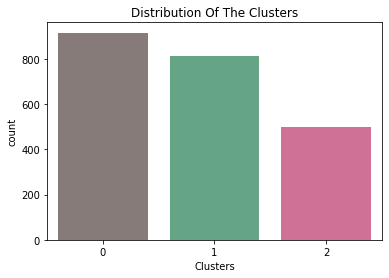

In [45]:
pal = ["#887A77", "#5AB085", "#DF6193"]
pl = sns.countplot(x=data["Clusters"], palette=pal)
pl.set_title("Distribution Of The Clusters")
plt.show()


# 1.2


In [55]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [57]:
data = pd.read_csv("/content/marketing.csv")
data

,ID,BirthYear,Education,Marital_Status,Income,NKids,EnrollDate,Recency,Complain,AmtFruits,AmtMeats,AmtFish,AmtSweets,AmtGold,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDiscPurchases,AccCampaign,Response
0,1,1985,Graduation,Married,70951.0,0,4/5/2013,66,0,10,554,254,87,54,3,4,9,1,None,No
1,2,1961,Graduation,Single,57091.0,0,15/6/2014,0,0,5,64,7,0,37,7,3,7,1,Second,Yes
2,3,1975,Master,Single,46098.0,2,18/8/2012,86,0,0,27,0,0,36,3,2,2,4,None,No
3,4,1947,PhD,Widow,25358.0,1,22/7/2013,57,0,0,5,0,0,8,1,0,3,2,None,No
4,5,1971,PhD,Married,60491.0,1,6/9/2013,81,0,47,237,12,19,76,6,11,7,4,None,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,2226,1991,Graduation,Together,89891.0,0,15/4/2013,17,0,22,132,59,28,183,11,6,8,1,None,No
2226,2227,1973,Graduation,Single,3502.0,1,13/4/2013,56,0,1,1,0,0,1,0,0,0,0,None,No
2227,2228,1966,Graduation,Together,70713.0,1,3/12/2012,23,0,114,279,82,76,190,5,6,8,6,None,No
2228,2229,1970,Graduation,Together,19656.0,1,8/2/2013,94,0,4,9,6,8,32,2,1,3,3,None,No


In [58]:
data = data.drop(['AccCampaign'],axis=1)
data

,ID,BirthYear,Education,Marital_Status,Income,NKids,EnrollDate,Recency,Complain,AmtFruits,AmtMeats,AmtFish,AmtSweets,AmtGold,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDiscPurchases,Response
0,1,1985,Graduation,Married,70951.0,0,4/5/2013,66,0,10,554,254,87,54,3,4,9,1,No
1,2,1961,Graduation,Single,57091.0,0,15/6/2014,0,0,5,64,7,0,37,7,3,7,1,Yes
2,3,1975,Master,Single,46098.0,2,18/8/2012,86,0,0,27,0,0,36,3,2,2,4,No
3,4,1947,PhD,Widow,25358.0,1,22/7/2013,57,0,0,5,0,0,8,1,0,3,2,No
4,5,1971,PhD,Married,60491.0,1,6/9/2013,81,0,47,237,12,19,76,6,11,7,4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,2226,1991,Graduation,Together,89891.0,0,15/4/2013,17,0,22,132,59,28,183,11,6,8,1,No
2226,2227,1973,Graduation,Single,3502.0,1,13/4/2013,56,0,1,1,0,0,1,0,0,0,0,No
2227,2228,1966,Graduation,Together,70713.0,1,3/12/2012,23,0,114,279,82,76,190,5,6,8,6,No
2228,2229,1970,Graduation,Together,19656.0,1,8/2/2013,94,0,4,9,6,8,32,2,1,3,3,No


In [59]:
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix = column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis = 1)
    return df

In [50]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Drop ID column
    df = df.drop('ID', axis=1)
    
    # Fill missing Income values with column mean
    df['Income'] = df['Income'].fillna(df['Income'].mean())
    
    # Date encoding
    df['EnrollDate'] = pd.to_datetime(df['EnrollDate'])
    df['Year_Customer'] = df['EnrollDate'].apply(lambda x: x.year)
    df['Month_Customer'] = df['EnrollDate'].apply(lambda x: x.month)
    df['Day_Customer'] = df['EnrollDate'].apply(lambda x: x.day)
    df = df.drop('EnrollDate', axis=1)
    
    # One-hot encoding
    for column in ['Education', 'Marital_Status']:
        df = onehot_encode(df, column=column)
    
    # Split df into X and y
    y = df['Response']
    X = df.drop('Response', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [60]:

X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [61]:
X_train

,BirthYear,Income,NKids,Recency,Complain,AmtFruits,AmtMeats,AmtFish,AmtSweets,AmtGold,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDiscPurchases,Year_Customer,Month_Customer,Day_Customer,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
336,0.758522,-0.839318,0.053496,1.667880,-0.181908,-0.614970,-0.680324,-0.637414,-0.658282,-0.651805,-0.750402,-0.917854,-1.161238,-0.685284,-0.043742,0.997764,1.083642,-0.327249,-0.139982,-1.005782,-0.433562,1.866985,0.0,-0.025318,-0.335583,-0.793370,-0.525709,1.683859,-0.187472,-0.025318
2017,1.414597,-0.453379,0.053496,-0.199364,-0.181908,-0.564353,-0.671650,-0.691872,-0.563748,-0.632414,-0.387634,-0.917854,-0.857299,-0.685284,-0.043742,-1.542114,-0.279790,-0.327249,-0.139982,-1.005782,2.306477,-0.535623,0.0,-0.025318,-0.335583,-0.793370,-0.525709,1.683859,-0.187472,-0.025318
434,0.676512,1.406047,-1.272014,0.181000,-0.181908,2.371405,1.644217,2.139947,0.287052,3.827613,-0.024866,2.122687,0.358457,-0.685284,1.409063,0.151138,-1.075126,-0.327249,-0.139982,0.994251,-0.433562,-0.535623,0.0,-0.025318,2.979890,-0.793370,-0.525709,-0.593874,-0.187472,-0.025318
680,0.512493,1.104716,0.053496,0.630522,-0.181908,-0.361887,-0.185925,-0.092833,-0.374682,0.628029,-0.750402,0.095659,-0.553360,-0.685284,-1.496548,1.279973,1.538119,-0.327249,-0.139982,0.994251,-0.433562,-0.535623,0.0,-0.025318,-0.335583,1.260446,-0.525709,-0.593874,-0.187472,-0.025318
30,0.922540,0.708647,0.053496,0.837994,-0.181908,0.296128,-0.450472,-0.092833,0.192519,0.453506,-0.024866,-0.580017,0.054518,-0.685284,1.409063,-1.259905,-1.643222,3.055773,-0.139982,-1.005782,-0.433562,-0.535623,0.0,-0.025318,-0.335583,-0.793370,1.902194,-0.593874,-0.187472,-0.025318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,-0.225592,-0.860504,0.053496,1.460408,-0.181908,-0.387195,-0.597924,-0.455887,-0.516482,-0.283368,-0.750402,-0.917854,-0.553360,-0.685284,-0.043742,0.715555,1.083642,-0.327249,-0.139982,-1.005782,2.306477,-0.535623,0.0,-0.025318,-0.335583,1.260446,-0.525709,-0.593874,-0.187472,-0.025318
905,0.840531,0.536147,1.379006,1.322094,-0.181908,-0.539045,-0.281336,-0.419582,-0.256515,0.182026,2.514508,-0.580017,0.054518,2.916493,-0.043742,-0.977697,0.970022,-0.327249,-0.139982,0.994251,-0.433562,-0.535623,0.0,-0.025318,-0.335583,1.260446,-0.525709,-0.593874,-0.187472,-0.025318
1096,0.676512,1.054618,-1.272014,-1.409615,5.497272,0.625135,3.153435,3.791841,-0.658282,0.821943,-0.387634,1.109173,0.358457,-0.685284,-1.496548,1.279973,-0.734268,-0.327249,-0.139982,0.994251,-0.433562,-0.535623,0.0,-0.025318,-0.335583,1.260446,-0.525709,-0.593874,-0.187472,-0.025318
235,1.496607,-0.471235,-1.272014,-0.890936,-0.181908,1.435000,0.416894,0.851106,0.736085,-0.167020,0.337901,-0.242179,1.574214,-0.170744,-0.043742,0.997764,-1.643222,-0.327249,-0.139982,-1.005782,-0.433562,1.866985,0.0,-0.025318,-0.335583,-0.793370,1.902194,-0.593874,-0.187472,-0.025318


In [62]:
y_train

336      No
2017     No
434     Yes
680      No
30       No
       ... 
960      No
905      No
1096     No
235     Yes
1061     No
Name: Response, Length: 1561, dtype: object

In [65]:
y_train = y_train.to_frame()['Response']
y_train = y_train.to_frame()['Response'].map({'Yes': 1, 'No': 0})
y_train

336     0
2017    0
434     1
680     0
30      0
       ..
960     0
905     0
1096    0
235     1
1061    0
Name: Response, Length: 1561, dtype: int64

Trainning

In [66]:
inputs = tf.keras.Input(shape = (X_train.shape[1], ))
x = tf.keras.layers.Dense(128, activation = 'relu')(inputs)
x = tf.keras.layers.Dense(128, activation = 'relu')(x)
outputs = tf.keras.layers.Dense(1, activation = 'sigmoid')(x)


model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy',
                       tf.keras.metrics.AUC(name='auc')])

history = model.fit(X_train, 
                  y_train,
                  validation_split = 0.2,
                  epochs  = 100,
                  callbacks = [
                      tf.keras.callbacks.EarlyStopping(
                      monitor = 'val_loss',
                      patience = 3,
                      restore_best_weights = True)
                  ])

Epoch 1/100
39/39 [==============================] - 2s 19ms/step - loss: 0.4916 - accuracy: 0.7837 - auc: 0.5480 - val_loss: 0.4137 - val_accuracy: 0.8275 - val_auc: 0.7135
Epoch 2/100
39/39 [==============================] - 0s 5ms/step - loss: 0.3595 - accuracy: 0.8558 - auc: 0.7914 - val_loss: 0.3738 - val_accuracy: 0.8307 - val_auc: 0.7981
Epoch 3/100
39/39 [==============================] - 0s 5ms/step - loss: 0.3251 - accuracy: 0.8598 - auc: 0.8444 - val_loss: 0.3595 - val_accuracy: 0.8339 - val_auc: 0.8200
Epoch 4/100
39/39 [==============================] - 0s 5ms/step - loss: 0.3013 - accuracy: 0.8686 - auc: 0.8719 - val_loss: 0.3492 - val_accuracy: 0.8466 - val_auc: 0.8314
Epoch 5/100
39/39 [==============================] - 0s 5ms/step - loss: 0.2835 - accuracy: 0.8838 - auc: 0.8873 - val_loss: 0.3440 - val_accuracy: 0.8339 - val_auc: 0.8421
Epoch 6/100
39/39 [==============================] - 0s 8ms/step - loss: 0.2747 - accuracy: 0.8886 - auc: 0.8940 - val_loss: 0.3440 - 

Result


In [71]:
y_test = y_test.to_frame()['Response']
y_test = y_test.to_frame()['Response'].map({'Yes': 1, 'No': 0})
y_test

485     0
201     0
2077    1
241     1
1516    0
       ..
1985    1
361     0
1789    0
115     0
1660    0
Name: Response, Length: 669, dtype: int64

In [72]:
results = model.evaluate(X_test, y_test, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))
print("     Test AUC: {:.5f}".format(results[2]))

    Test Loss: 0.32192
Test Accuracy: 86.70%
     Test AUC: 0.82139


21/21 [==============================] - 0s 1ms/step


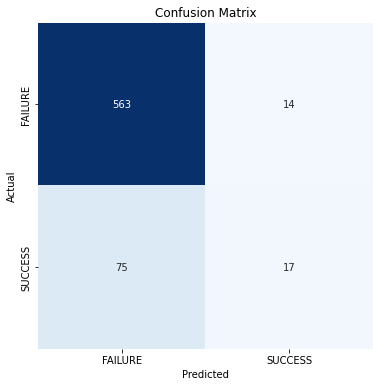

Classification Report:
----------------------
               precision    recall  f1-score   support

     FAILURE       0.88      0.98      0.93       577
     SUCCESS       0.55      0.18      0.28        92

    accuracy                           0.87       669
   macro avg       0.72      0.58      0.60       669
weighted avg       0.84      0.87      0.84       669



In [73]:
y_pred = np.array(model.predict(X_test) >= 0.5, dtype=np.int)

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=["FAILURE", "SUCCESS"])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(2) + 0.5, labels=["FAILURE", "SUCCESS"])
plt.yticks(ticks=np.arange(2) + 0.5, labels=["FAILURE", "SUCCESS"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)